In [1]:
# importing dependancies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# defining data files
mouse_data_file = "data/Mouse_metadata.csv"
study_results_file = "data/Study_results.csv"

# read the csv files and load them to pandas
mouse_data = pd.read_csv(mouse_data_file)
study_data = pd.read_csv(study_results_file)

# merging the datasets into a combined dataset
complete_study_data = pd.merge(study_data, mouse_data, how='left', on=["Mouse ID", "Mouse ID"])
complete_study_data.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
# Checking the number of mice in the DataFrame.
print(complete_study_data["Mouse ID"].count())

1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_data = complete_study_data[complete_study_data.duplicated(["Mouse ID", "Timepoint"])]
print((duplicate_mice_data["Mouse ID"]).to_string(index=False))

 g989
 g989
 g989
 g989
 g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_study_data = complete_study_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
unique_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
print(unique_study_data["Mouse ID"].count())

1888


In [7]:
# grouping dataset by Drug Regimen and perform statistics by regimen
drug_regimen_data = unique_study_data.groupby(["Drug Regimen"])
drug_regimen_data.first()

# calculating various statistics
mean_tumor_volume = drug_regimen_data["Tumor Volume (mm3)"].mean()
median_tumor_volume = drug_regimen_data["Tumor Volume (mm3)"].median()
variance_tumor_volume = drug_regimen_data["Tumor Volume (mm3)"].var()
standard_deviation_tumor_volume = drug_regimen_data["Tumor Volume (mm3)"].std()
SEM_tumor_volume = drug_regimen_data["Tumor Volume (mm3)"].sem()


# creating new dataframe
summary_drug_data = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Variance Tumor Volume": variance_tumor_volume,
    "Standard Deviation Tumor Volume": standard_deviation_tumor_volume,
    "SEM Tumor Volume": SEM_tumor_volume,
})

# formatting data
summary_drug_data["Mean Tumor Volume"] = summary_drug_data["Mean Tumor Volume"].map("{:.4f}".format)
summary_drug_data["Median Tumor Volume"] = summary_drug_data["Median Tumor Volume"].map("{:.4f}".format)
summary_drug_data["Variance Tumor Volume"] = summary_drug_data["Variance Tumor Volume"].map("{:.4f}".format)
summary_drug_data["Standard Deviation Tumor Volume"] = summary_drug_data["Standard Deviation Tumor Volume"].map("{:.4f}".format)
summary_drug_data["SEM Tumor Volume"] = summary_drug_data["SEM Tumor Volume"].map("{:.4f}".format)

# display summary statistics
summary_drug_data

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3935,50.9100,43.1388,6.5680,0.5259
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [8]:
# creating new dataframe grouped by timepoint & performing mouse headcount for each timepoint
time_point_data = unique_study_data.groupby(["Timepoint"])
mice_count_by_time_point = time_point_data["Mouse ID"].count()

# creating new dataframe for charts
mice_count_data_for_bar_chart = pd.DataFrame({
    "Mice Count": mice_count_by_time_point
})

# display dataframe as point of reference
mice_count_data_for_bar_chart

,Mice Count
Timepoint,
0,249
5,237
10,222
15,206
20,194
25,183
30,171
35,154
40,142


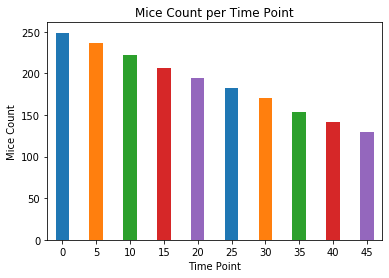

In [18]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
group_keys = list(time_point_data.groups.keys())
mice_per_time_point_in_panda = pd.DataFrame({'x_axis':group_keys, 'mice_count':mice_count_by_time_point})
mice_per_time_point_in_panda.plot.bar(x='x_axis', y='mice_count', color=['C0', 'C1', 'C2', 'C3', 'C4'], rot=0, width=0.4, title="Mice Count per Time Point", legend=False)

# Adding axis labels
_=plt.xlabel("Time Point")
_=plt.ylabel("Mice Count")

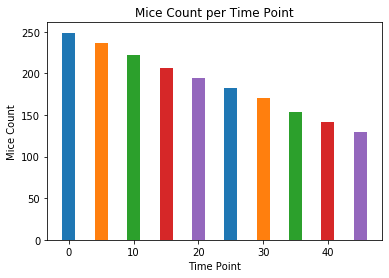

In [17]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = time_point_data.groups.keys()
mice_count = mice_count_by_time_point
plt.bar(x_axis, mice_count, color=['C0', 'C1', 'C2', 'C3', 'C4'], width=2, alpha=1, align="center")

# Adding axis label and title of the chart
_=plt.title("Mice Count per Time Point")
_=plt.xlabel("Time Point")
_=plt.ylabel("Mice Count")

In [11]:
# creating new dataframe grouped by the gender of the mouse
gender_data = unique_study_data.groupby(["Sex"])
mice_count_by_gender = gender_data["Mouse ID"].count()

# creating new dataframe for charts
mice_by_gender_for_pie_chart = pd.DataFrame({
    "Mice Count": mice_count_by_gender
})

# display dataframe as point of reference
mice_by_gender_for_pie_chart

,Mice Count
Sex,
Female,930
Male,958


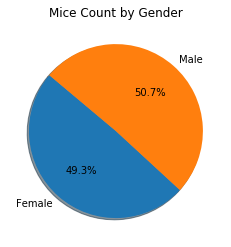

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Labels for the sections of our pie chart
labels = ["Female", "Male"]
# The values of each section of the pie chart
head_count = mice_count_by_gender
# The colors of each section of the pie chart
colors = ["C0", "C1"]
mice_count_by_gender.plot.pie(y=head_count, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, title="Mice Count by Gender")
# Removing y-axis label
_=plt.ylabel("")

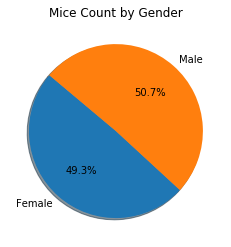

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Plot the chart in MatPlotLib
plt.pie(head_count, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Adding title of the chart
_=plt.title("Mice Count by Gender")